In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# penguins dataset
df = sns.load_dataset("penguins")


In [3]:
# drop rows with nan value, and rearrange the index
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3

In [5]:
# classify columns
continuous_variables = df.dtypes[df.dtypes != 'object'].index.values
discrete_variables = df.dtypes[df.dtypes == 'object'].index.values

print('column possible values:')
col_values = {}
for col in discrete_variables:
    col_values[col] = df.groupby(col).all().index.values.tolist()
    print(col + ' ' * (14 - len(col)) + ': ', col_values[col])

column possible values:
species       :  ['Adelie', 'Chinstrap', 'Gentoo']
island        :  ['Biscoe', 'Dream', 'Torgersen']
sex           :  ['FEMALE', 'MALE']


In [6]:
# transfer str discrete columns to int columns
for col_name, col_value in col_values.items():
    class_mapping = {label: idx for idx, label in enumerate(col_value)}
    df[col_name + '_label'] = df[col_name].map(class_mapping)

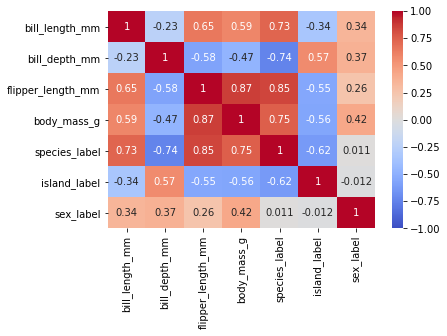

In [7]:
# heatmap
sns.heatmap(df.corr(), vmin=-1, annot=True, cmap='coolwarm')
plt.show()
# The heatmap shows the strongest correlation between flipper_length_mm and body_mass_g,
# the weakest correlation between bill_depth_mm and flipper_length_mm.

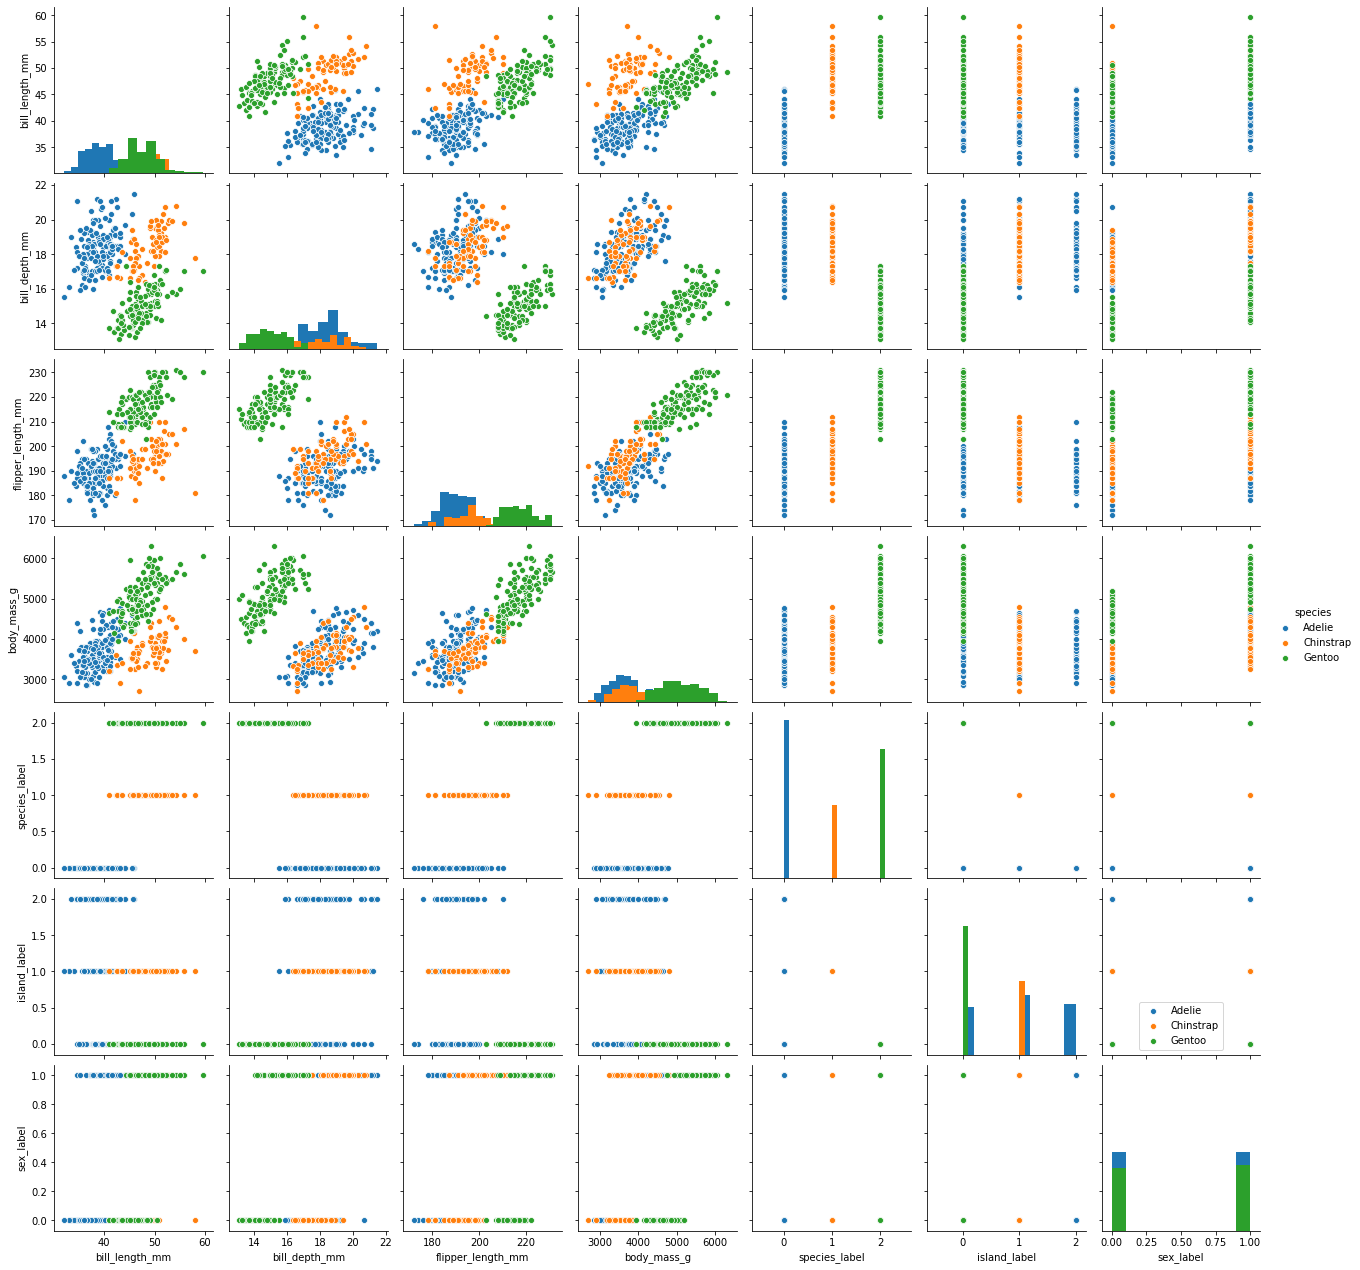

In [8]:
# pairplot, by species
sns.pairplot(data=df, diag_kind='hist', hue='species')
plt.legend()
plt.show()
# The pairplot shows the correlation between any two characteristics in three species,
# and the difference between Gentoo and the other two species is the most obvious in
# flipper_length_mm and bill_depth_mm.

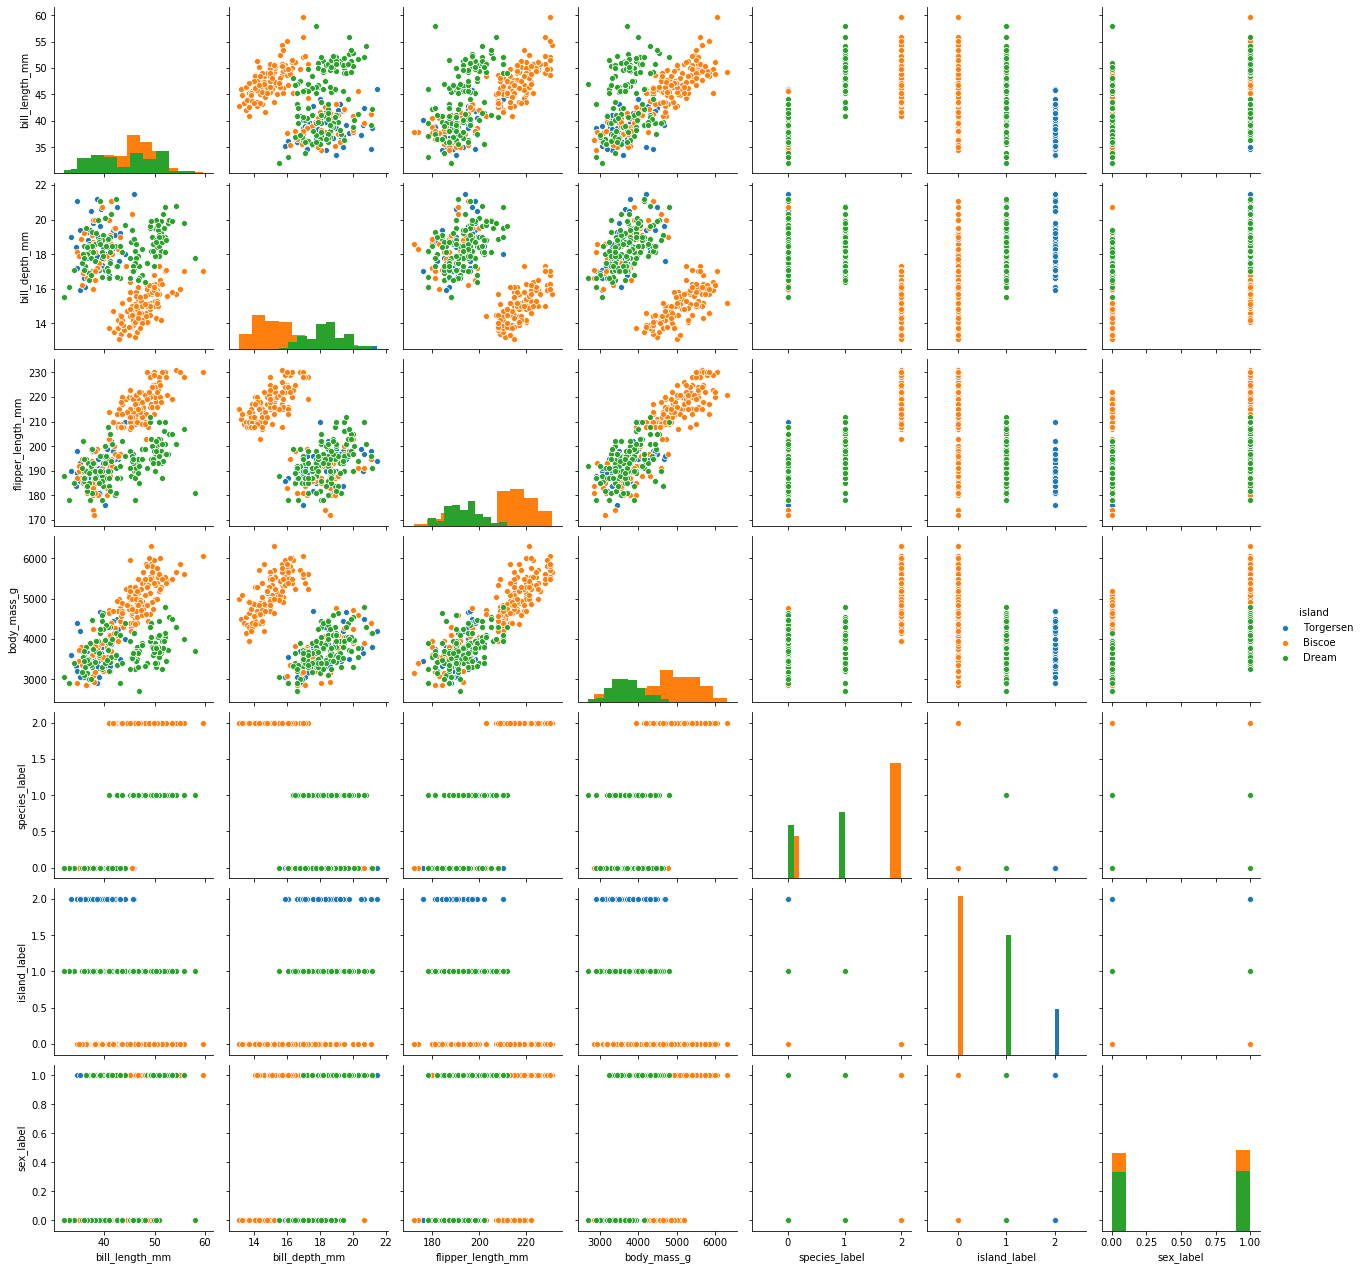

In [9]:
# pairplot, by island
sns.pairplot(data=df, diag_kind='hist', hue='island')
plt.show()
# The pairplot shows the correlation between any two characteristics in three island,
# and the difference between Biscoe and the other two islands is the most obvious in
# flipper_length_mm and bill_depth_mm.

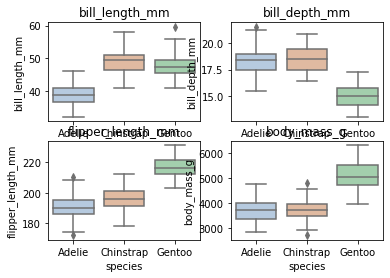

In [10]:
# The distribution difference of different species on different characteristics
plt.figure()
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', saturation=0.5, palette='pastel', data=df)
plt.title('bill_length_mm')
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', saturation=0.5, palette='pastel', data=df)
plt.title('bill_depth_mm')
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='flipper_length_mm', saturation=0.5, palette='pastel', data=df)
plt.title('flipper_length_mm')
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='body_mass_g', saturation=0.5, palette='pastel', data=df)
plt.title('body_mass_g')
plt.show()
# The boxplot shows the distribution interval of the characteristics of different species.
# and it is obvious that the body of Gentoo species is larger than other species

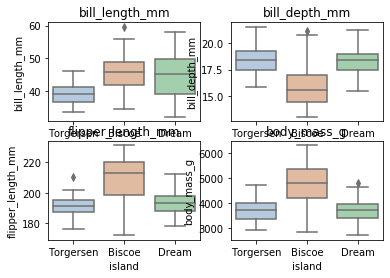

In [11]:
# The distribution difference of different island on different characteristics
plt.figure()
plt.subplot(2, 2, 1)
sns.boxplot(x='island', y='bill_length_mm', saturation=0.5, palette='pastel', data=df)
plt.title('bill_length_mm')
plt.subplot(2, 2, 2)
sns.boxplot(x='island', y='bill_depth_mm', saturation=0.5, palette='pastel', data=df)
plt.title('bill_depth_mm')
plt.subplot(2, 2, 3)
sns.boxplot(x='island', y='flipper_length_mm', saturation=0.5, palette='pastel', data=df)
plt.title('flipper_length_mm')
plt.subplot(2, 2, 4)
sns.boxplot(x='island', y='body_mass_g', saturation=0.5, palette='pastel', data=df)
plt.title('body_mass_g')
plt.show()
# The boxplot shows the distribution interval of the characteristics of different islands.
# and it is obvious that the bill of the penguin in Dream island is more widely distributed.

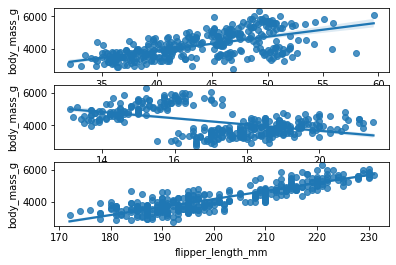

In [12]:
# a scattergram with the linear model
plt.figure()
plt.subplot(3, 1, 1)
g = sns.regplot(data=df, x='bill_length_mm', y='body_mass_g')
plt.subplot(3, 1, 2)
g = sns.regplot(data=df, x='bill_depth_mm', y='body_mass_g')
plt.subplot(3, 1, 3)
g = sns.regplot(data=df, x='flipper_length_mm', y='body_mass_g')
plt.show()
# The regplot shows a scattergram with the linear model, only shows a few of them, and we can
# get that the bigger their flippers are, the bigger they are.



